In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd
import geopandas as gpd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
bigp = ['AL', 'BNP', 'Jamaat', 'JaPa']
mainp = ['AL', 'BNP']
years = [1991, 1996, 2001, 2008]

In [3]:
dfs = pd.read_csv('data/seat_summary.csv')
dfs.head()

,seat,year,turnout,turnout_pc,voters
0,Panchagarh-1,2024,192579.0,44.08,436923.0
1,Panchagarh-1,2018,320597.0,84.54,379207.0
2,Panchagarh-1,2014,86046.0,26.16,328959.0
3,Panchagarh-1,2008,266812.0,91.70,291095.0
4,Panchagarh-1,2001,206827.0,86.15,240073.0


In [4]:
dfs.shape

(1279, 5)

In [5]:
# only take 2008 election data
dfs = dfs[dfs.year == 2008]
dfs.shape

(280, 5)

In [6]:
bdmap = gpd.read_file('map/seats.shp')
bdmap.head()

,seat_no,seat,district,division,region,shape_len,shape_area,geometry
0,1,Panchagarh-1,Panchagarh,Rangpur,Urban,2.787812,0.061199,"POLYGON ((88.72746 26.34527, 88.72772 26.34494..."
1,2,Panchagarh-2,Panchagarh,Rangpur,Rural,1.411258,0.064286,"POLYGON ((88.76158 26.30059, 88.76176 26.29971..."
2,3,Thakurgaon-1,Thakurgaon,Rangpur,Urban,1.255212,0.058832,"POLYGON ((88.55589 26.17948, 88.55684 26.17788..."
3,4,Thakurgaon-2,Thakurgaon,Rangpur,Rural,1.858839,0.045806,"POLYGON ((88.32191 26.20205, 88.3222 26.20129,..."
4,5,Thakurgaon-3,Thakurgaon,Rangpur,Rural,1.810654,0.059069,"POLYGON ((88.25475 26.03583, 88.25828 26.03391..."


In [7]:
dfs['voters'] = round(dfs['turnout'] * 100 / dfs['turnout_pc'])
dfs.head()

,seat,year,turnout,turnout_pc,voters
3,Panchagarh-1,2008,266812.0,91.70,290962.0
8,Panchagarh-2,2008,235845.0,93.00,253597.0
12,Thakurgaon-1,2008,304544.0,92.94,327678.0
16,Thakurgaon-2,2008,202341.0,92.70,218275.0
21,Thakurgaon-3,2008,216275.0,91.40,236625.0


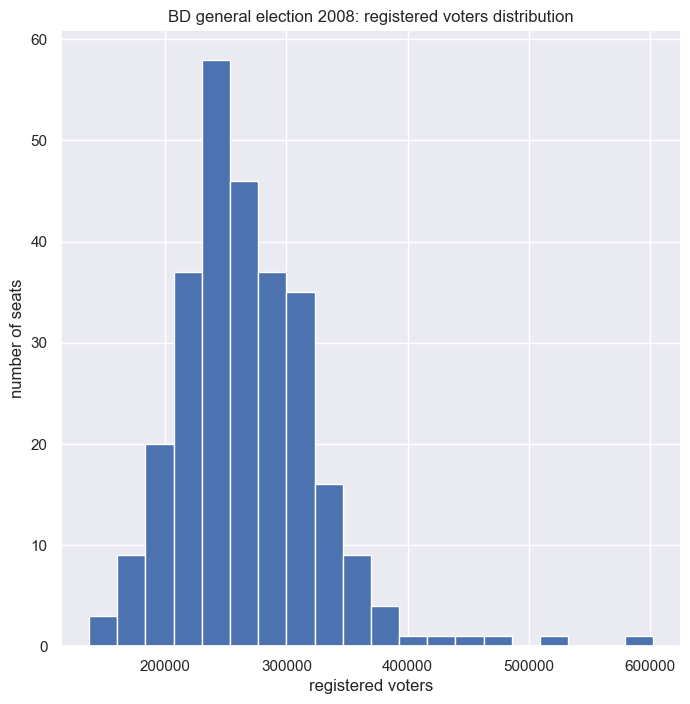

In [17]:
# plot histogram
fig, ax = plt.subplots(figsize=(8, 8))
dfs.voters.hist(bins=20, ax=ax)
ax.set_title('BD general election 2008: registered voters distribution')
ax.set_xlabel('registered voters')
ax.set_ylabel('number of seats')
fig.savefig('fig/voters_distn',bbox_inches='tight')

In [8]:
# join data with map data
map_v = pd.merge(bdmap, dfs[['seat', 'voters']], how='left', on='seat')
map_v.head()

,seat_no,seat,district,division,region,shape_len,shape_area,geometry,voters
0,1,Panchagarh-1,Panchagarh,Rangpur,Urban,2.787812,0.061199,"POLYGON ((88.72746 26.34527, 88.72772 26.34494...",290962.0
1,2,Panchagarh-2,Panchagarh,Rangpur,Rural,1.411258,0.064286,"POLYGON ((88.76158 26.30059, 88.76176 26.29971...",253597.0
2,3,Thakurgaon-1,Thakurgaon,Rangpur,Urban,1.255212,0.058832,"POLYGON ((88.55589 26.17948, 88.55684 26.17788...",327678.0
3,4,Thakurgaon-2,Thakurgaon,Rangpur,Rural,1.858839,0.045806,"POLYGON ((88.32191 26.20205, 88.3222 26.20129,...",218275.0
4,5,Thakurgaon-3,Thakurgaon,Rangpur,Rural,1.810654,0.059069,"POLYGON ((88.25475 26.03583, 88.25828 26.03391...",236625.0


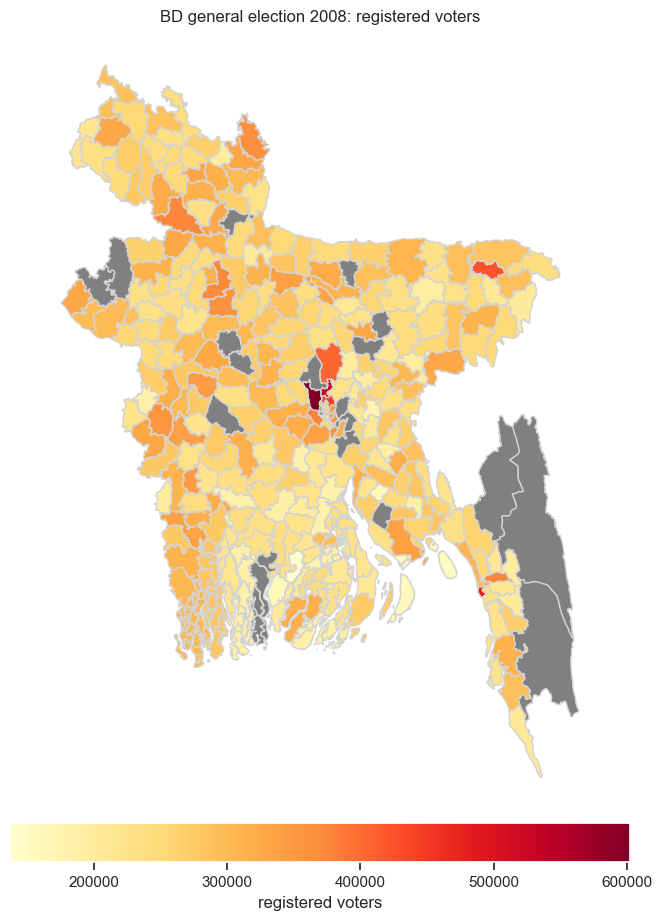

In [18]:
# plot map
fig, ax = plt.subplots(figsize=(8, 14))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

map_v.plot(
    column='voters', 
    cmap='YlOrRd', 
    edgecolor='lightgrey',
    legend=True, 
    ax=ax,
    cax=cax,
    missing_kwds={
        "color": "grey",
        "label": "missing data",
    }, 
    legend_kwds={
        'label': 'registered voters',
        'orientation': 'horizontal'
    },
)
ax.set_axis_off()
ax.title.set_text("BD general election 2008: registered voters")
fig.savefig('fig/voters_map',bbox_inches='tight')

In [20]:
# save interactive map
fol = map_v.explore(
    column="voters", 
    tooltip="voters", 
    popup=True, 
    cmap='plasma', 
    style_kwds=dict(color="lightgrey"), 
)

fol.save('mapout/voters_map.html')

In [12]:
# find population density
def get_popn_density(row):
    density = np.nan
    if pd.notnull(row.voters):
        density = row.voters / row.shape_area / 1000000 # just to get rid of exponent
    return density

map_v['popn_density'] = map_v.apply(get_popn_density, axis=1)
map_v.head()

,seat_no,seat,district,division,region,shape_len,shape_area,geometry,voters,popn_density
0,1,Panchagarh-1,Panchagarh,Rangpur,Urban,2.787812,0.061199,"POLYGON ((88.72746 26.34527, 88.72772 26.34494...",290962.0,4.754389
1,2,Panchagarh-2,Panchagarh,Rangpur,Rural,1.411258,0.064286,"POLYGON ((88.76158 26.30059, 88.76176 26.29971...",253597.0,3.944832
2,3,Thakurgaon-1,Thakurgaon,Rangpur,Urban,1.255212,0.058832,"POLYGON ((88.55589 26.17948, 88.55684 26.17788...",327678.0,5.569709
3,4,Thakurgaon-2,Thakurgaon,Rangpur,Rural,1.858839,0.045806,"POLYGON ((88.32191 26.20205, 88.3222 26.20129,...",218275.0,4.765211
4,5,Thakurgaon-3,Thakurgaon,Rangpur,Rural,1.810654,0.059069,"POLYGON ((88.25475 26.03583, 88.25828 26.03391...",236625.0,4.005897


In [ ]:
# plot map
fig, ax = plt.subplots(figsize=(8, 14))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

map_v.plot(
    column='popn_density', 
    cmap='YlOrRd', 
    edgecolor='lightgrey',
    legend=False, 
    ax=ax,
    cax=cax,
    missing_kwds={
        "color": "grey",
        "label": "missing data",
    }, 
    legend_kwds={
        'label': 'registered voters',
        'orientation': 'horizontal'
    },
)
ax.set_axis_off()
ax.title.set_text("BD general election 2008: registered voters")
fig.savefig('fig/voters_map',bbox_inches='tight')